**Оценка стоимости жилья в Калифорнии с помощью линейной регрессии**

В данном примере используется модель линейной регрессии для прогнозирования стоимости жилья в Калифорнии на основе данных о различных характеристиках домов. Проведена загрузка данных, разделение, обучение модели, предсказание и визуализация результатов.

Пример данных из датасета в виде таблицы:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target (Price)  
0    -122.23           4.526  
1    -122.22           3.585  
2    -122.24           3.521  
3    -122.25           3.413  
4    -122.25           3.422  


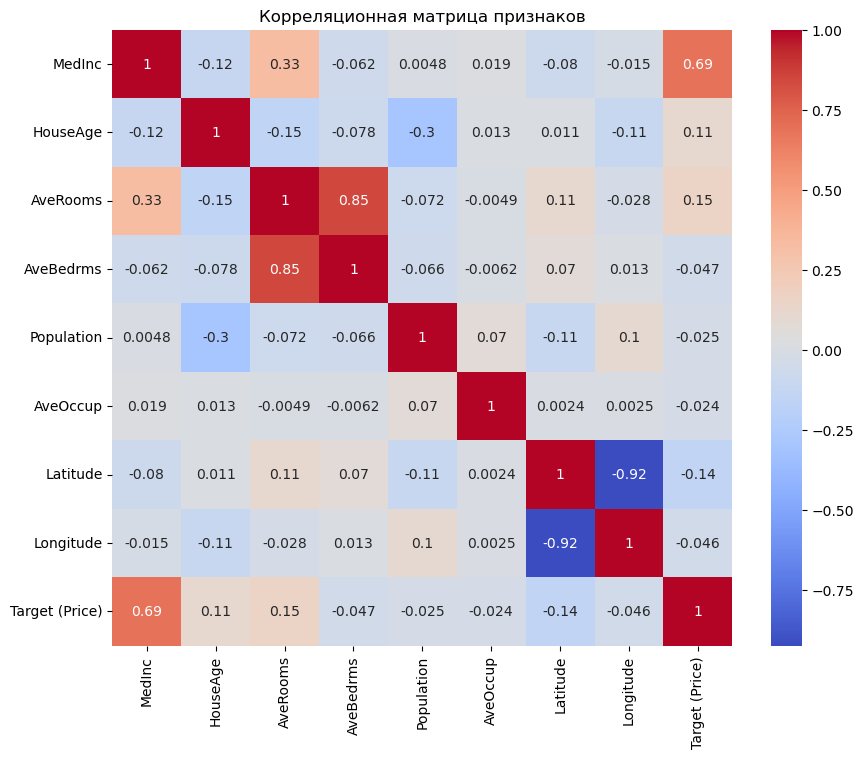

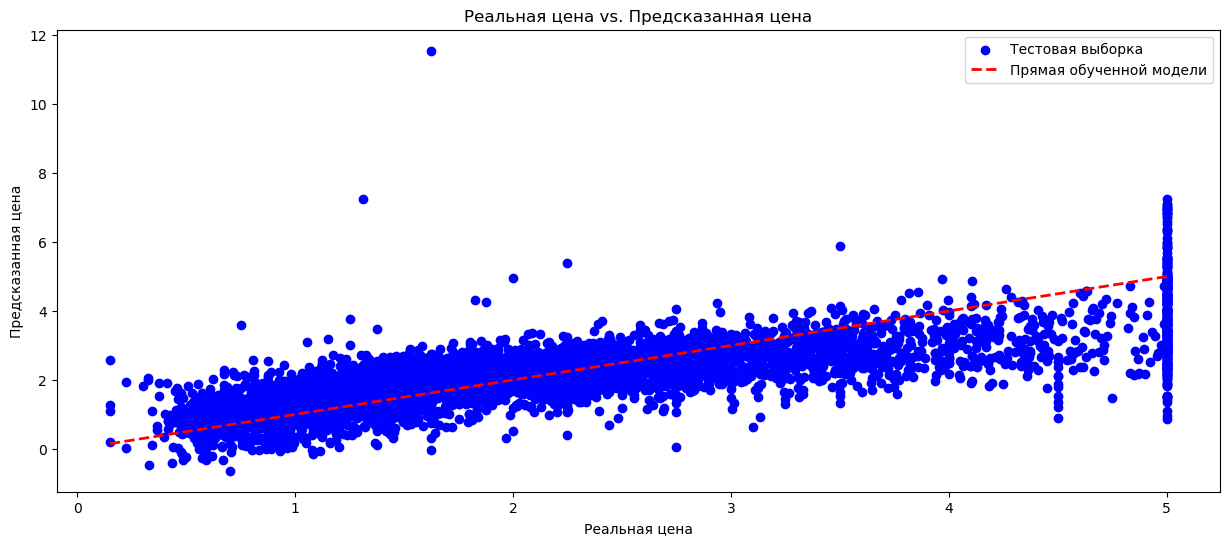

Mean squared error: 0.56
Coefficient of determination R^2: 0.58


In [1]:
# Используемые библиотеки
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import seaborn as sns

# Загрузка датасета
california_housing = fetch_california_housing()

# Разделение данных на признаки и целевую переменную
X = california_housing.data
y = california_housing.target

# Создание DataFrame для данных и их названий
data = pd.DataFrame(data=X[:5], columns=california_housing.feature_names)
data['Target (Price)'] = y[:5]
print("Пример данных из датасета в виде таблицы:")
print(data)

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=54)

# Создание DataFrame для тепловой карты
data_full = pd.DataFrame(data=X, columns=california_housing.feature_names)
data_full['Target (Price)'] = y

# Тепловая карта
plt.figure(figsize=(10, 8))
sns.heatmap(data_full.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица признаков')
plt.show()

# Создание и обучение модели линейной регрессии
regr = LinearRegression()
regr.fit(X_train, y_train)

# Предсказание значений для тестовой выборки
y_pred = regr.predict(X_test)

# Визуализация результата модели
plt.figure(figsize=(15, 6))
plt.scatter(y_test, y_pred, color='blue', label='Тестовая выборка')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Прямая обученной модели')
plt.xlabel('Реальная цена')
plt.ylabel('Предсказанная цена')
plt.title('Реальная цена vs. Предсказанная цена')
plt.legend()
plt.show()

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error: %.2f' % mse)
print('Coefficient of determination R^2: %.2f' % r2)
